# Noun Semantics in the Hebrew Bible

*This notebook will contain the descriptions and analysis for the presentation on noun semantics in the Hebrew Bible.*

In [20]:
# ETCBC's BHSA data
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa

# stats & data-containers
import collections
import pandas as pd
import numpy as np
import scipy.stats as stats

# data visualizations
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

# prep the data
name = 'noun_semantics'
hebrew_data = ['~/github/etcbc/{}/tf/c'.format(direc) for direc in ('bhsa','lingo/heads', 'phono')] # data dirs
load_features = '''
heads typ phono lex_utf8 freq_lex pdp sp ls
''' 

# TF load statements
TF = Fabric(locations=hebrew_data, silent=True)
api = TF.load(load_features)
B = Bhsa(api=api, hoist=globals(), silent=True, name=name) # Bhsa functions for search and visualizing text

  0.00s loading features ...
   |     0.16s B lex_utf8             from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.19s B phono                from /Users/cody/github/etcbc/phono/tf/c
   |     2.38s B heads                from /Users/cody/github/etcbc/lingo/heads/tf/c
   |     0.18s B typ                  from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.08s B freq_lex             from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.10s B pdp                  from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.10s B sp                   from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.10s B ls                   from /Users/cody/github/etcbc/bhsa/tf/c
  8.65s All features loaded/computed - for details use loadLog()


In [2]:
def reverse_hb(heb_text):
    return ''.join(reversed(heb_text))

## Define a Target Noun Set

*Insert discussion about the semantic relationship between iconicity and frequency with regards to the most frequent noun lexemes in the HB.*

*Also some discussion about Zipfian curves. 

In [3]:
search_set = 'lex sp=subs'

all_nouns = B.search(search_set)

  0.11s 4076 results


### Plot the Nouns in Order of Frequency

[]

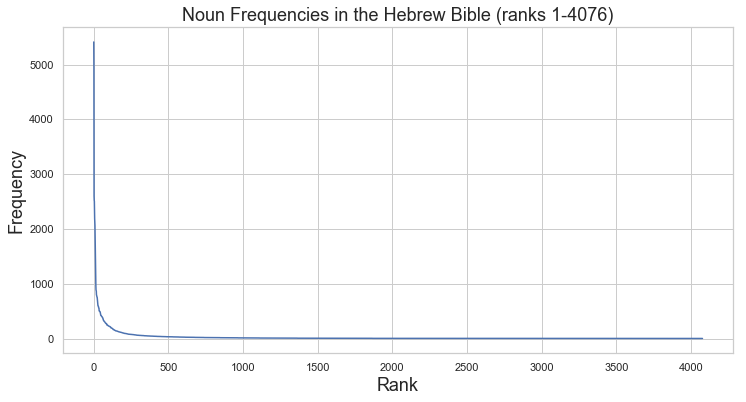

In [10]:
ordered = sorted(((F.freq_lex.v(res[0]), res[0]) for res in all_nouns), reverse=True)
y_freqs = [lex_data[0] for lex_data in ordered]
x_count = [i+1 for i in range(0, len(y_freqs))]
terms = [F.lex_utf8.v(L.d(lex_data[1], 'word')[0]) for lex_data in ordered]

title = 'Noun Frequencies in the Hebrew Bible'
xlabel = 'Rank'
ylabel = 'Frequency'

plt.figure(figsize=(12, 6))
plt.plot(x_count, y_freqs)
plt.title(title + f' (ranks 1-{len(x_count)})', size=18)
plt.xlabel(xlabel, size=18)
plt.ylabel(ylabel, size=18)
plt.plot()

[]

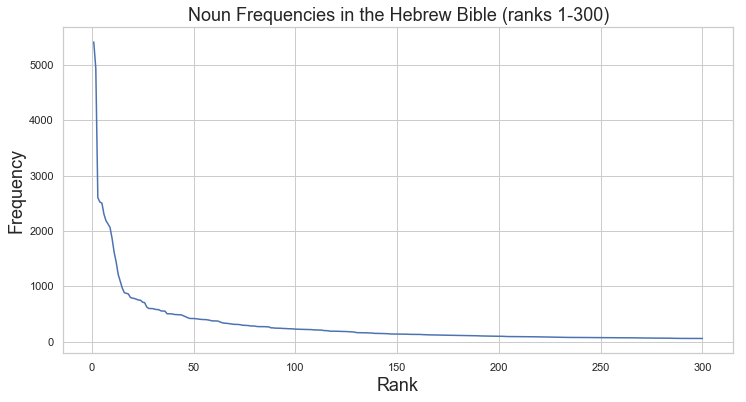

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(x_count[:300], y_freqs[:300])
plt.title(title + f' (ranks 1-300)', size=18)
plt.xlabel(xlabel, size=18)
plt.ylabel(ylabel, size=18)
plt.plot()

This curve is typical of Zipf's law:

> Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table ([wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law))

The curve "elbows" at around rank 15, and the terms in ranks 1-50 show the sharpest drop-off in frequency. Between ranks 50-100 there is still an appreciable curve. The curve flattens out around rank 150. Thus, we decide an arbitrary cut-off point at rank 150.

Below we have a look at the selected set and display the lexeme frequency. A key feature that we can examine alongside the terms is the ETCBC feature lexical set (`ls`). This feature gives us some rudimentary semantic information about the nouns and the way they are used. Note that some of these nouns are frequently used in adjectival or prepositional roles. These may ultimately be undesirable in the analysis set due to their primarily functional role. 

In [57]:
term_nodes = [res[1] for res in ordered[:150]] # extract top 150 lex nodes
B.prettySetup(features={'ls', 'freq_lex'}) # config B to display ls and freq_lex

# display lexeme data
for i, term, node in zip(range(1, len(terms)), terms, term_nodes):
    B.prettyTuple((node,), seqNumber=i)



**Result** *1*





**Result** *2*





**Result** *3*





**Result** *4*





**Result** *5*





**Result** *6*





**Result** *7*





**Result** *8*





**Result** *9*





**Result** *10*





**Result** *11*





**Result** *12*





**Result** *13*





**Result** *14*





**Result** *15*





**Result** *16*





**Result** *17*





**Result** *18*





**Result** *19*





**Result** *20*





**Result** *21*





**Result** *22*





**Result** *23*





**Result** *24*





**Result** *25*





**Result** *26*





**Result** *27*





**Result** *28*





**Result** *29*





**Result** *30*





**Result** *31*





**Result** *32*





**Result** *33*





**Result** *34*





**Result** *35*





**Result** *36*





**Result** *37*





**Result** *38*





**Result** *39*





**Result** *40*





**Result** *41*





**Result** *42*





**Result** *43*





**Result** *44*





**Result** *45*





**Result** *46*





**Result** *47*





**Result** *48*





**Result** *49*





**Result** *50*





**Result** *51*





**Result** *52*





**Result** *53*





**Result** *54*





**Result** *55*





**Result** *56*





**Result** *57*





**Result** *58*





**Result** *59*





**Result** *60*





**Result** *61*





**Result** *62*





**Result** *63*





**Result** *64*





**Result** *65*





**Result** *66*





**Result** *67*





**Result** *68*





**Result** *69*





**Result** *70*





**Result** *71*





**Result** *72*





**Result** *73*





**Result** *74*





**Result** *75*





**Result** *76*





**Result** *77*





**Result** *78*





**Result** *79*





**Result** *80*





**Result** *81*





**Result** *82*





**Result** *83*





**Result** *84*





**Result** *85*





**Result** *86*





**Result** *87*





**Result** *88*





**Result** *89*





**Result** *90*





**Result** *91*





**Result** *92*





**Result** *93*





**Result** *94*





**Result** *95*





**Result** *96*





**Result** *97*





**Result** *98*





**Result** *99*





**Result** *100*





**Result** *101*





**Result** *102*





**Result** *103*





**Result** *104*





**Result** *105*





**Result** *106*





**Result** *107*





**Result** *108*





**Result** *109*





**Result** *110*





**Result** *111*





**Result** *112*





**Result** *113*





**Result** *114*





**Result** *115*





**Result** *116*





**Result** *117*





**Result** *118*





**Result** *119*





**Result** *120*





**Result** *121*





**Result** *122*





**Result** *123*





**Result** *124*





**Result** *125*





**Result** *126*





**Result** *127*





**Result** *128*





**Result** *129*





**Result** *130*





**Result** *131*





**Result** *132*





**Result** *133*





**Result** *134*





**Result** *135*





**Result** *136*





**Result** *137*





**Result** *138*





**Result** *139*





**Result** *140*





**Result** *141*





**Result** *142*





**Result** *143*





**Result** *144*





**Result** *145*





**Result** *146*





**Result** *147*





**Result** *148*





**Result** *149*





**Result** *150*



Based on the nouns that are present, we should make some key exclusions. Many substantives have more functional or adjectival roles such as cardinal numbers and near-prepositions. By restricting the possible lexical set (`ls`) values in a new  search template, we can eliminate these kinds of nouns, including copulative nouns (`nmcp`, e.g. אין), cardinal numbers (`card`), potential prepositions (`ppre`), *cont...* 